## Import libraries


In [66]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

## Data

In [78]:
# read files
unprocessed_df = pd.read_csv("../Data/US_videos.csv")

# read json file
with open("../Data/US_category_id.json") as train_file:
    categories = json.load(train_file)["items"]
unprocessed_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [79]:
def get_category_id(categories):
    cat_dict = {}
    for cat in categories:
        cat_dict[int(cat["id"])] = cat["snippet"]["title"]
    return cat_dict

cat_dict = get_category_id(categories)
unprocessed_df['category_name'] = unprocessed_df['category_id'].map(cat_dict)
unprocessed_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment


In [69]:
unprocessed_df.isnull().sum()
# Only desc has nulls 

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_name               0
dtype: int64

Filter for the last row

In [80]:
idx = unprocessed_df.groupby(['video_id'])['trending_date'].transform(max) == unprocessed_df['trending_date']

unprocessed_df = unprocessed_df[idx]

In [46]:
#df statistics
unprocessed_df.describe()

,category_id,views,likes,dislikes,comment_count,published_month,trending_month,dayofweek,trending_day,hour,min,sec,count_word,count_word_tags,count_unique_word,count_unique_word_tags,neutral,y,y_2
count,6354.000000,6.354000e+03,6.354000e+03,6.354000e+03,6.354000e+03,6354.00000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6.354000e+03,6.354000e+03,6.354000e+03
mean,20.429178,1.964289e+06,5.562110e+04,3.066895e+03,6.454952e+03,5.68146,5.466320,3.629997,3.814133,13.517155,19.527227,21.001259,8.717186,17.265345,8.518256,19.961127,1.905601e+06,6.547630e+05,5.049775e+05
std,7.230859,7.060575e+06,1.938276e+05,3.198095e+04,3.381791e+04,4.39218,4.282178,1.844034,1.896482,6.493851,19.739679,18.932016,3.524616,13.691530,3.333369,12.163037,6.885590e+06,2.353525e+06,1.805788e+06
min,1.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.500000e+02,1.863333e+02,1.420000e+02
25%,17.000000,1.591880e+05,2.773750e+03,1.270000e+02,3.722500e+02,2.00000,2.000000,2.000000,2.000000,9.000000,0.000000,3.000000,6.000000,6.000000,6.000000,10.000000,1.529870e+05,5.306267e+04,4.115550e+04
50%,24.000000,5.184375e+05,1.190850e+04,4.445000e+02,1.266500e+03,4.00000,4.000000,4.000000,4.000000,15.000000,14.000000,16.000000,8.000000,14.000000,8.000000,19.000000,4.992745e+05,1.728125e+05,1.333882e+05
75%,25.000000,1.475408e+06,3.846475e+04,1.509750e+03,4.070500e+03,11.00000,11.000000,5.000000,5.000000,18.000000,35.000000,37.000000,11.000000,27.000000,11.000000,29.000000,1.421216e+06,4.918027e+05,3.821548e+05
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,12.00000,12.000000,7.000000,7.000000,23.000000,59.000000,59.000000,23.000000,87.000000,20.000000,69.000000,2.198449e+08,7.507064e+07,5.755884e+07


We first need to define popularity levels. The levels can be defined using #comments. #views, #likes and #dislikes. 
Lets analyze the distribution of these variables. As the scale of the variables is really high the variables are transformed
on a log scale

In [55]:
unprocessed_df[['views_log', 'dislikes_log', 'likes_log']] = np.log(unprocessed_df[['views', 'dislikes', 'likes']] +1)

unprocessed_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,count_word,count_word_tags,count_unique_word,count_unique_word_tags,neutral,y,y_2,views_log,dislikes_log,likes_log
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,...,16,8,15,49,80697,27125.666667,20508.00,11.306860,3.258097,6.486161
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,...,8,33,8,28,280615,96307.333333,74109.25,12.573915,6.675823,8.924789


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


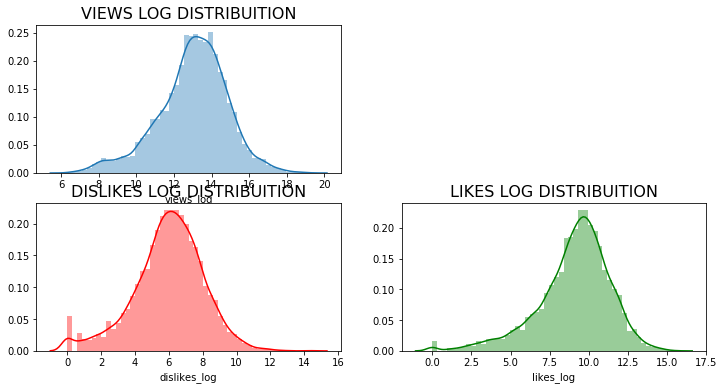

In [49]:
plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(unprocessed_df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(unprocessed_df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(unprocessed_df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.show()



## Month wise distribution for published time

In [82]:
unprocessed_df['publish_time'] = pd.to_datetime(unprocessed_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
unprocessed_df['published_month'] = unprocessed_df['publish_time'].dt.month
# plt.subplot(211)
# g = sns.lineplot(x = 'published_month', y = "x", data=unprocessed_df, palette="Set1", estimator = lambda unprocessed_df: np.mean(unprocessed_df['views']))
# g.set_xticklabels(g.get_xticklabels(),rotation=45)
# g.set_title("Counting Months ", fontsize=20)
# g.set_xlabel("Months", fontsize=15)
# g.set_ylabel("Count", fontsize=15)

Months from june till Nov has very less published videos. Maximum videos are published in the month of May.


## Month wise distribution for trending date

Text(0,0.5,'Count')

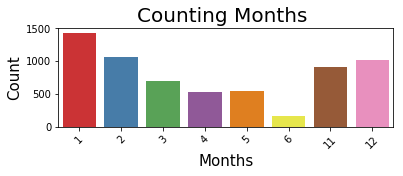

In [83]:
unprocessed_df['trending_date'] = pd.to_datetime(unprocessed_df['trending_date'], format='%y.%d.%m')
unprocessed_df['trending_month'] = unprocessed_df['trending_date'].dt.month

plt.subplot(211)
g = sns.countplot('trending_month', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

Months from june till Nov do not have trending data.

## Day wise distribution for published time

Text(0,0.5,'Count')

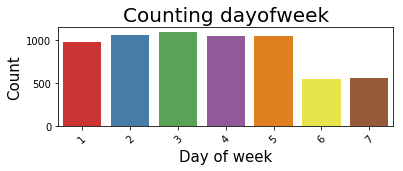

In [85]:
unprocessed_df['publish_time_dayofweek'] = unprocessed_df['publish_time'].dt.dayofweek+1
plt.subplot(211)
g = sns.countplot('publish_time_dayofweek', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting dayofweek", fontsize=20)
g.set_xlabel("Day of week", fontsize=15)
g.set_ylabel("Count", fontsize=15)

In [87]:
unprocessed_df['publish_weekend'] = unprocessed_df['publish_time_dayofweek']>5
unprocessed_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,published_month,trending_month,publish_time_dayofweek,publish_weekend
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,...,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,Sports,11,11,1,False
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,...,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,Film & Animation,11,11,7,True


Surprisingly weekends (6 & 7) has less published videos that weekdays


## Day wise distribution for trending date

4    1294
3    1216
2     961
1     840
5     721
6     694
7     628
Name: trending_dayofweek, dtype: int64


Text(0,0.5,'Count')

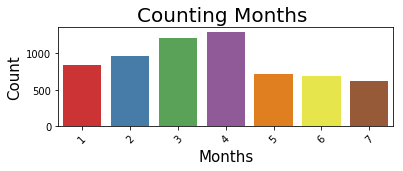

In [88]:
unprocessed_df['trending_dayofweek'] = unprocessed_df['trending_date'].dt.dayofweek+1

print(unprocessed_df['trending_dayofweek'].value_counts())
plt.subplot(211)
g = sns.countplot('trending_dayofweek', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

In [89]:
unprocessed_df['trending_weekend'] = unprocessed_df['trending_dayofweek']>5
unprocessed_df.head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,category_name,published_month,trending_month,publish_time_dayofweek,publish_weekend,trending_dayofweek,trending_weekend
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,...,False,False,New England Patriots returner Dion Lewis blast...,Sports,11,11,1,False,2,False
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,...,False,False,With Justice League approaching fast we rewatc...,Film & Animation,11,11,7,True,2,False


All weeks have more or less same trending counts in the data

In [90]:
# separates date and time into two columns from 'publish_time' column
unprocessed_df['time'] = unprocessed_df['publish_time'].dt.time

unprocessed_df[['hour','min','sec']] = unprocessed_df['time'].astype(str).str.split(':', expand=True).astype(int)

unprocessed_df['hour'][:5]

10     2
36    18
41    21
55    19
76    12
Name: hour, dtype: int32

Text(0,0.5,'Count')

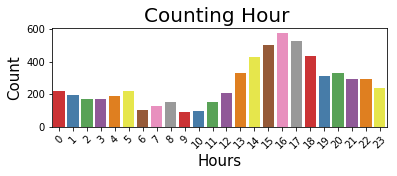

In [54]:
plt.subplot(211)
g = sns.countplot('hour', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

In [59]:
unprocessed_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'published_month', 'trending_month', 'dayofweek', 'trending_day',
       'time', 'hour', 'min', 'sec', 'count_word', 'count_word_tags',
       'count_unique_word', 'count_unique_word_tags', 'neutral', 'y', 'y_2',
       'views_log', 'dislikes_log', 'likes_log'],
      dtype='object')

Text(0,0.5,'Count')

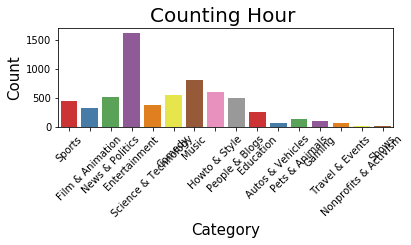

In [61]:
plt.subplot(212)
g = sns.countplot('category_name', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)

Maximum videos are published during 15,16,17 hours. 

## Visualizing title data with wordcloud

In [ ]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(unprocessed_df['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

In [91]:
#Word count in each comment:
unprocessed_df['count_word']=unprocessed_df["title"].apply(lambda x: len(str(x).split()))
unprocessed_df['count_word_tags']=unprocessed_df["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
unprocessed_df['count_unique_word']=unprocessed_df["title"].apply(lambda x: len(set(str(x).split())))
unprocessed_df['count_unique_word_tags']=unprocessed_df["tags"].apply(lambda x: len(set(str(x).split())))


unprocessed_df['count_tags']=unprocessed_df["tags"].apply(lambda x: len(set(str(x).split("|"))))



In [92]:
unprocessed_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'published_month', 'trending_month', 'publish_time_dayofweek',
       'publish_weekend', 'trending_dayofweek', 'trending_weekend', 'time',
       'hour', 'min', 'sec', 'count_word', 'count_word_tags',
       'count_unique_word', 'count_unique_word_tags', 'count_tags'],
      dtype='object')

          video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
5      gHZ1Qz0KiKM    2017-11-14   
6      39idVpFF7NQ    2017-11-14   
7      nc99ccSXST0    2017-11-14   
8      jr9QtXwC9vc    2017-11-14   
9      TUmyygCMMGA    2017-11-14   
10     9wRQljFNDW8    2017-11-14   
11     VifQlJit6A0    2017-11-14   
12     5E4ZBSInqUU    2017-11-14   
13     GgVmn66oK_A    2017-11-14   
14     TaTleo4cOs8    2017-11-14   
15     kgaO45SyaO4    2017-11-14   
16     ZAQs-ctOqXQ    2017-11-14   
17     YVfyYrEmzgM    2017-11-14   
18     eNSN6qet1kE    2017-11-14   
19     B5HORANmzHw    2017-11-14   
20     vU14JY3x81A    2017-11-14   
21     6VhU_T463sU    2017-11-14   
22     _-aDHxoblr4    2017-11-14   
23     JBZTZZAcFTw    2017-11-14   
24     lZ68j2J_GOM    2017-11-14   
25     dRpNZV18N_g    2017-11-14   
26     fcVjitaM3LY    2017-1

In [94]:
def outcome(unprocessed_df, w1,w2,w3, iter = 1):
    unprocessed_df['neutral']=unprocessed_df['views']-unprocessed_df['likes']-unprocessed_df['dislikes']
    y=w1*unprocessed_df['likes']+w2*unprocessed_df['neutral']+w3*unprocessed_df['dislikes']
    unprocessed_df["y_cat_"+ str(iter)] =pd.qcut(y,3,labels=["low", "medium", "high"])  
    return unprocessed_df

unprocessed_df = outcome(unprocessed_df, 1/3,1/3,1/3, 1) # equally important
unprocessed_df = outcome(unprocessed_df, 1/2,1/4,1/4, 2) # likes more important
unprocessed_df = outcome(unprocessed_df, 1/2,3/8,1/8, 3) # likes more important

In [106]:
unprocessed_df.to_csv("../Data/features_data.csv") 

In [101]:
unprocessed_df.shape

(6354, 36)

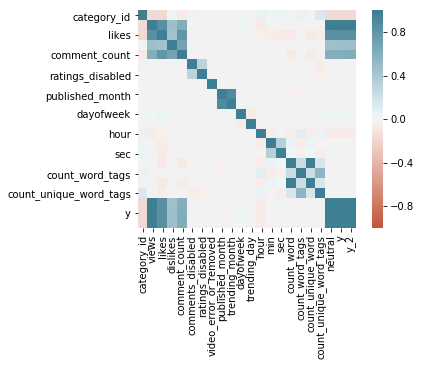

In [33]:
corr = unprocessed_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [38]:
idx = unprocessed_df.groupby(['video_id'])['trending_date'].transform(max) == unprocessed_df['trending_date']

check = unprocessed_df[idx]

In [43]:
corr = check.corr()
corr

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_month,trending_month,...,hour,min,sec,count_word,count_word_tags,count_unique_word,count_unique_word_tags,neutral,y,y_2
category_id,1.000000,-0.152422,-0.152751,-0.017652,-0.059394,0.044553,-0.018695,-0.013639,-0.014127,-0.003272,...,0.069155,0.018505,0.024232,0.010816,0.072258,0.009200,0.142676,-0.151914,-0.152422,-0.153090
views,-0.152422,1.000000,0.834709,0.441794,0.573688,0.002890,0.016401,-0.002613,-0.026036,-0.010564,...,-0.044668,-0.026515,-0.032617,-0.037118,0.030041,-0.036717,-0.014839,0.999864,1.000000,0.999891
likes,-0.152751,0.834709,1.000000,0.420533,0.765114,-0.023906,-0.019766,-0.003118,-0.014117,-0.001932,...,-0.021215,-0.055052,-0.053459,-0.075047,-0.011184,-0.073490,-0.027470,0.825819,0.834709,0.842756
dislikes,-0.017652,0.441794,0.420533,1.000000,0.734892,-0.003250,-0.006606,-0.000712,-0.003586,-0.000837,...,0.001675,0.018176,0.005207,-0.033667,0.014358,-0.033185,0.009675,0.436539,0.441794,0.443135
comment_count,-0.059394,0.573688,0.765114,0.734892,1.000000,-0.024744,-0.012436,-0.002687,-0.013245,-0.003028,...,0.001608,-0.010916,-0.021034,-0.070951,0.002080,-0.070028,-0.005393,0.563317,0.573688,0.581307
comments_disabled,0.044553,0.002890,-0.023906,-0.003250,-0.024744,1.000000,0.279217,-0.003253,0.001250,0.006642,...,-0.009944,0.030249,0.038663,0.024764,-0.029114,0.021698,-0.053688,0.003652,0.002890,0.002184
ratings_disabled,-0.018695,0.016401,-0.019766,-0.006606,-0.012436,0.279217,1.000000,-0.001729,-0.019574,-0.018225,...,0.018204,0.010024,0.000238,-0.006850,-0.032694,-0.009332,-0.037534,0.017405,0.016401,0.015501
video_error_or_removed,-0.013639,-0.002613,-0.003118,-0.000712,-0.002687,-0.003253,-0.001729,1.000000,0.013250,0.001663,...,-0.000066,0.001237,0.010936,-0.012229,-0.006903,-0.013315,-0.021072,-0.002588,-0.002613,-0.002638
published_month,-0.014127,-0.026036,-0.014117,-0.003586,-0.013245,0.001250,-0.019574,0.013250,1.000000,0.856035,...,0.018895,-0.009257,-0.005640,-0.011311,-0.040168,-0.011580,-0.024684,-0.026284,-0.026036,-0.025829
trending_month,-0.003272,-0.010564,-0.001932,-0.000837,-0.003028,0.006642,-0.018225,0.001663,0.856035,1.000000,...,0.018932,-0.004106,-0.009148,-0.004266,-0.019387,-0.004484,-0.008008,-0.010774,-0.010564,-0.010378
